In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from load_mnist import load_mnist
from utils import train_neural_network

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

# Exercise 1.1  Multi-layer fully-connected neural network

In [4]:
# Hyperparameters
input_size = 784  # 28x28 images
hidden_size_1 = 256
hidden_size_2 = 128
num_classes = 10
num_epochs = 100
batch_size = 128
learning_rate = 0.001

In [5]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size: int, hidden_size_1: int, hidden_size_2: int, num_classes: int):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
# Initialize the model
model = NeuralNet(input_size, hidden_size_1, hidden_size_2, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch 1/100, Train Loss: 2.2901, Test Loss: 2.2800, Train Accuracy: 20.62%, Test Accuracy: 24.60%
Epoch 2/100, Train Loss: 2.2706, Test Loss: 2.2583, Train Accuracy: 29.98%, Test Accuracy: 34.64%
Epoch 3/100, Train Loss: 2.2472, Test Loss: 2.2314, Train Accuracy: 38.16%, Test Accuracy: 43.69%
Epoch 4/100, Train Loss: 2.2177, Test Loss: 2.1972, Train Accuracy: 47.06%, Test Accuracy: 53.26%
Epoch 5/100, Train Loss: 2.1799, Test Loss: 2.1533, Train Accuracy: 54.95%, Test Accuracy: 59.49%
Epoch 6/100, Train Loss: 2.1309, Test Loss: 2.0962, Train Accuracy: 59.81%, Test Accuracy: 63.04%
Epoch 7/100, Train Loss: 2.0672, Test Loss: 2.0224, Train Accuracy: 62.81%, Test Accuracy: 64.52%
Epoch 8/100, Train Loss: 1.9857, Test Loss: 1.9291, Train Accuracy: 64.46%, Test Accuracy: 65.83%
Epoch 9/100, Train Loss: 1.8844, Test Loss: 1.8157, Train Accuracy: 66.22%, Test Accuracy: 67.32%
Epoch 10/100, Train Loss: 1.7640, Test Loss: 1.6845, Train Accuracy: 67.95%, Test Accuracy: 69.17%
Epoch 11/100, Train

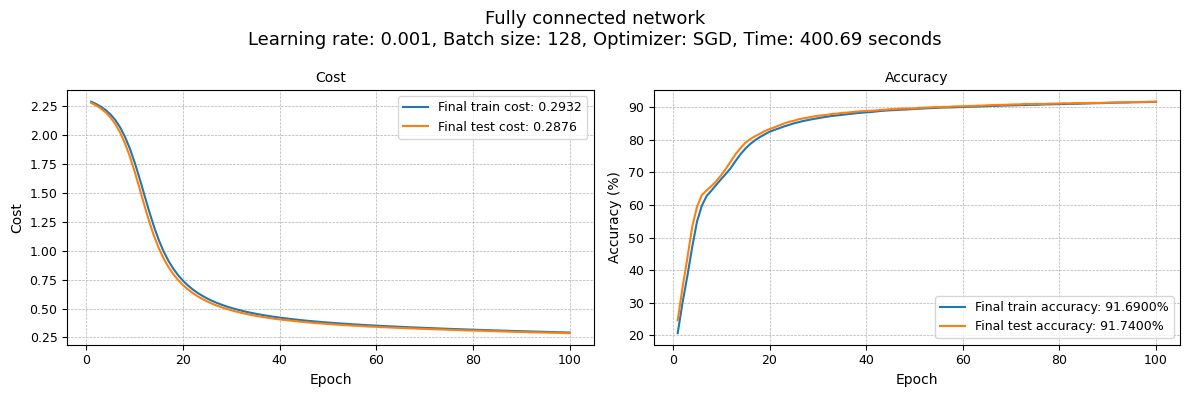

Runtime of train_neural_network: 401.7422 seconds


In [7]:
train_neural_network(model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Fully connected network")

# Exercise 1.2 Multi-layer convolutional network

In [8]:
# Convert data to PyTorch tensors
X_train_tensor_3D = torch.tensor(X_train, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor_3D = torch.tensor(X_test, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor_3D, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor_3D, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Epoch 1/50, Train Loss: 1.9664, Test Loss: 0.6478, Train Accuracy: 48.44%, Test Accuracy: 83.09%
Epoch 2/50, Train Loss: 0.4396, Test Loss: 0.3367, Train Accuracy: 87.04%, Test Accuracy: 90.33%
Epoch 3/50, Train Loss: 0.3062, Test Loss: 0.2627, Train Accuracy: 90.87%, Test Accuracy: 92.73%
Epoch 4/50, Train Loss: 0.2453, Test Loss: 0.2113, Train Accuracy: 92.68%, Test Accuracy: 94.23%
Epoch 5/50, Train Loss: 0.2007, Test Loss: 0.1758, Train Accuracy: 94.00%, Test Accuracy: 94.93%
Epoch 6/50, Train Loss: 0.1687, Test Loss: 0.1485, Train Accuracy: 94.96%, Test Accuracy: 95.53%
Epoch 7/50, Train Loss: 0.1455, Test Loss: 0.1251, Train Accuracy: 95.59%, Test Accuracy: 96.25%
Epoch 8/50, Train Loss: 0.1288, Test Loss: 0.1144, Train Accuracy: 96.16%, Test Accuracy: 96.65%
Epoch 9/50, Train Loss: 0.1158, Test Loss: 0.1003, Train Accuracy: 96.52%, Test Accuracy: 96.87%
Epoch 10/50, Train Loss: 0.1057, Test Loss: 0.0904, Train Accuracy: 96.78%, Test Accuracy: 97.08%
Epoch 11/50, Train Loss: 0.09

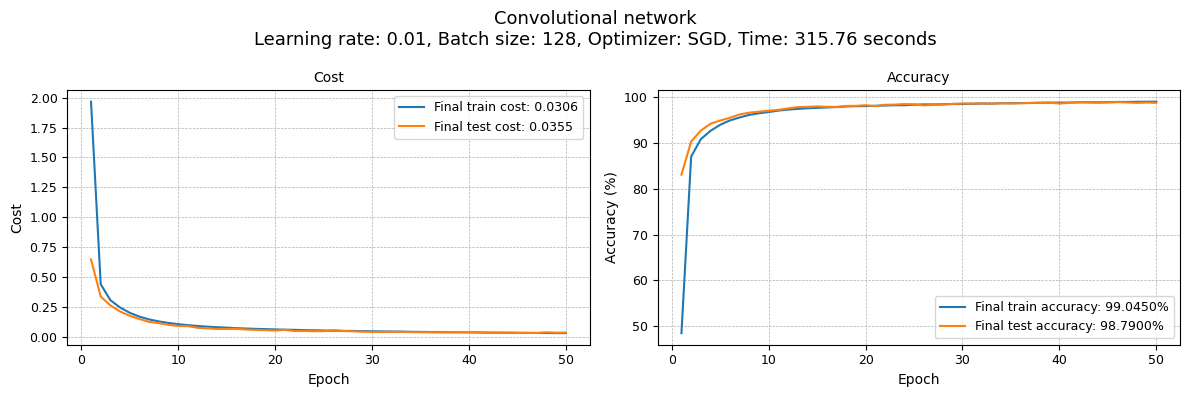

Runtime of train_neural_network: 316.4988 seconds


In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


# Hyperparameters
num_epochs = 50
learning_rate = 0.01

conv_model = ConvNet().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model.parameters(), lr=learning_rate)
train_neural_network(conv_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network")


# Exercise 1.3 Swap the order of max-pool and activation function

## a\) Swap order of max-pool and ReLU

Epoch 1/50, Train Loss: 2.2000, Test Loss: 1.4901, Train Accuracy: 35.12%, Test Accuracy: 70.36%
Epoch 2/50, Train Loss: 0.6133, Test Loss: 0.4277, Train Accuracy: 81.65%, Test Accuracy: 86.90%
Epoch 3/50, Train Loss: 0.3423, Test Loss: 0.2762, Train Accuracy: 89.56%, Test Accuracy: 92.05%
Epoch 4/50, Train Loss: 0.2669, Test Loss: 0.2286, Train Accuracy: 91.82%, Test Accuracy: 93.18%
Epoch 5/50, Train Loss: 0.2187, Test Loss: 0.1932, Train Accuracy: 93.39%, Test Accuracy: 94.21%
Epoch 6/50, Train Loss: 0.1854, Test Loss: 0.1574, Train Accuracy: 94.42%, Test Accuracy: 95.49%
Epoch 7/50, Train Loss: 0.1589, Test Loss: 0.1507, Train Accuracy: 95.23%, Test Accuracy: 95.32%
Epoch 8/50, Train Loss: 0.1403, Test Loss: 0.1184, Train Accuracy: 95.74%, Test Accuracy: 96.23%
Epoch 9/50, Train Loss: 0.1255, Test Loss: 0.1048, Train Accuracy: 96.22%, Test Accuracy: 96.87%
Epoch 10/50, Train Loss: 0.1136, Test Loss: 0.1000, Train Accuracy: 96.57%, Test Accuracy: 96.93%
Epoch 11/50, Train Loss: 0.10

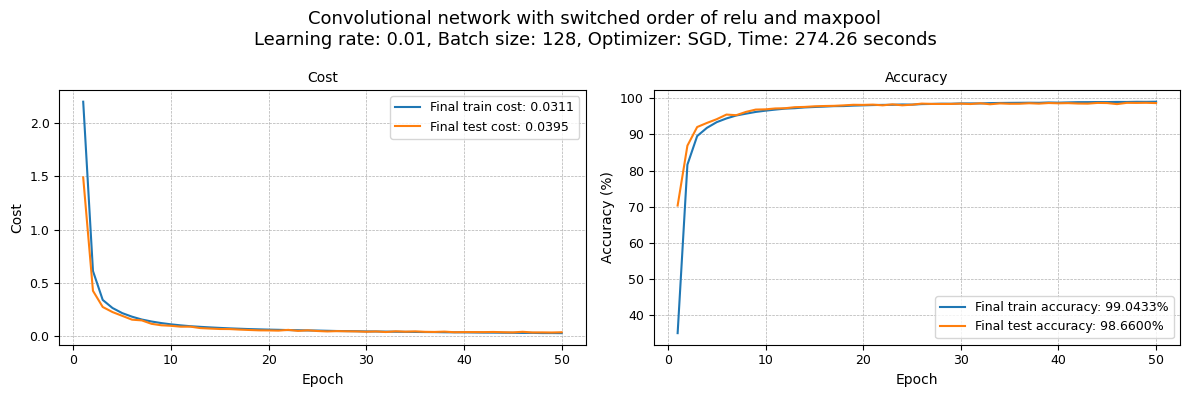

Runtime of train_neural_network: 274.7562 seconds


In [10]:
class ConvNetSwitch(nn.Module):
    def __init__(self):
        super(ConvNetSwitch, self).__init__()
        # Switch order of relu and maxpool
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu2 = nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.relu1(out)
        
        out = self.conv2(out)
        out = self.pool2(out)
        out = self.relu2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

    
conv_switch_model = ConvNetSwitch().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_switch_model.parameters(), lr=learning_rate)
train_neural_network(conv_switch_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network with switched order of relu and maxpool")

## b\) Use tanh activation instead of ReLU

Epoch 1/50, Train Loss: 1.5111, Test Loss: 0.6654, Train Accuracy: 61.83%, Test Accuracy: 82.87%
Epoch 2/50, Train Loss: 0.5333, Test Loss: 0.4360, Train Accuracy: 84.92%, Test Accuracy: 87.82%
Epoch 3/50, Train Loss: 0.4072, Test Loss: 0.3635, Train Accuracy: 88.11%, Test Accuracy: 89.51%
Epoch 4/50, Train Loss: 0.3544, Test Loss: 0.3259, Train Accuracy: 89.53%, Test Accuracy: 90.80%
Epoch 5/50, Train Loss: 0.3214, Test Loss: 0.2973, Train Accuracy: 90.46%, Test Accuracy: 91.50%
Epoch 6/50, Train Loss: 0.2964, Test Loss: 0.2750, Train Accuracy: 91.16%, Test Accuracy: 92.24%
Epoch 7/50, Train Loss: 0.2758, Test Loss: 0.2576, Train Accuracy: 91.75%, Test Accuracy: 92.77%
Epoch 8/50, Train Loss: 0.2578, Test Loss: 0.2398, Train Accuracy: 92.28%, Test Accuracy: 93.24%
Epoch 9/50, Train Loss: 0.2416, Test Loss: 0.2245, Train Accuracy: 92.79%, Test Accuracy: 93.56%
Epoch 10/50, Train Loss: 0.2265, Test Loss: 0.2109, Train Accuracy: 93.22%, Test Accuracy: 93.89%
Epoch 11/50, Train Loss: 0.21

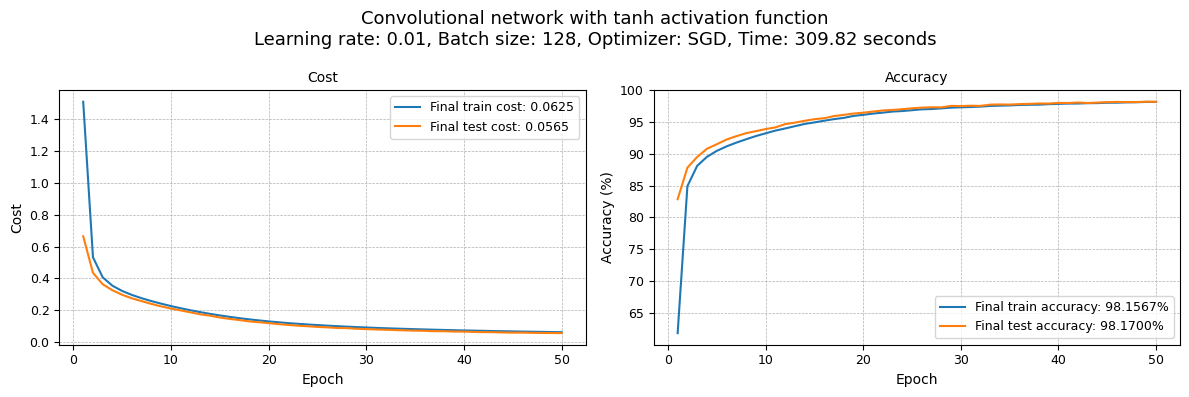

Runtime of train_neural_network: 310.4940 seconds


In [11]:
class ConvNetTanh(nn.Module):
    def __init__(self):
        super(ConvNetTanh, self).__init__()
        # Switch order of relu and maxpool
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh1 = nn.Tanh()
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh2 = nn.Tanh()
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.tanh3 = nn.Tanh()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.tanh1(out)
        
        out = self.conv2(out)
        out = self.pool2(out)
        out = self.tanh2(out)
        
        out = self.conv3(out)
        out = self.tanh3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

    
conv_switch_tanh_model = ConvNetTanh().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_switch_tanh_model.parameters(), lr=learning_rate)
train_neural_network(conv_switch_tanh_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network with tanh activation function")


# Exercise 1.4 Use the ADAM Optimizer

Epoch 1/50, Train Loss: 0.1893, Test Loss: 0.0599, Train Accuracy: 93.97%, Test Accuracy: 98.02%
Epoch 2/50, Train Loss: 0.0597, Test Loss: 0.0383, Train Accuracy: 98.17%, Test Accuracy: 98.79%
Epoch 3/50, Train Loss: 0.0488, Test Loss: 0.0442, Train Accuracy: 98.49%, Test Accuracy: 98.63%
Epoch 4/50, Train Loss: 0.0447, Test Loss: 0.0667, Train Accuracy: 98.64%, Test Accuracy: 98.05%
Epoch 5/50, Train Loss: 0.0444, Test Loss: 0.0384, Train Accuracy: 98.58%, Test Accuracy: 98.69%
Epoch 6/50, Train Loss: 0.0388, Test Loss: 0.0580, Train Accuracy: 98.77%, Test Accuracy: 98.49%
Epoch 7/50, Train Loss: 0.0390, Test Loss: 0.0484, Train Accuracy: 98.77%, Test Accuracy: 98.45%
Epoch 8/50, Train Loss: 0.0361, Test Loss: 0.0576, Train Accuracy: 98.87%, Test Accuracy: 98.55%
Epoch 9/50, Train Loss: 0.0343, Test Loss: 0.0645, Train Accuracy: 98.93%, Test Accuracy: 98.40%
Epoch 10/50, Train Loss: 0.0366, Test Loss: 0.0621, Train Accuracy: 98.86%, Test Accuracy: 98.52%
Epoch 11/50, Train Loss: 0.03

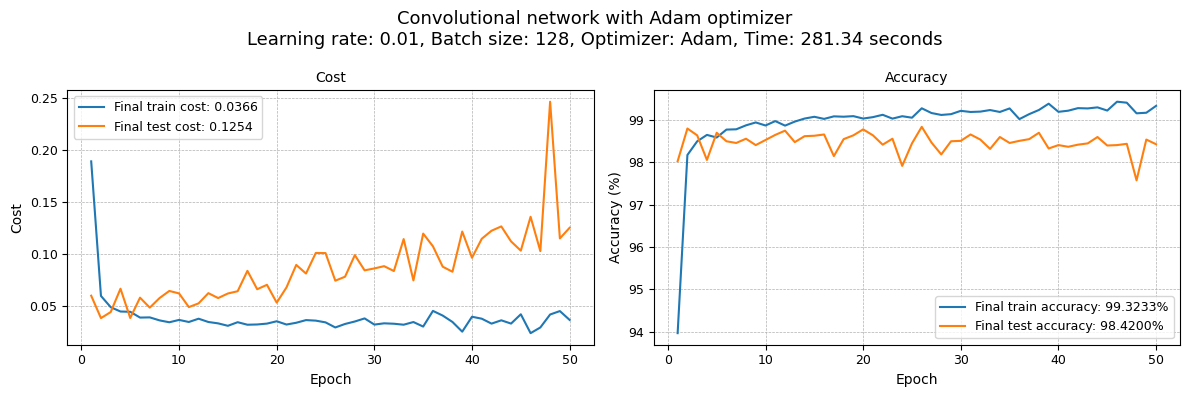

Runtime of train_neural_network: 281.8635 seconds


In [12]:
conv_model = ConvNet().to(device)
optimizer = torch.optim.Adam(conv_model.parameters(), lr=learning_rate)
train_neural_network(conv_model, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network with Adam optimizer")
